# フィッシャーの線形判別

In [1]:
include("linear_classification.jl")
using .linear_classification

## 問題：2クラス分類

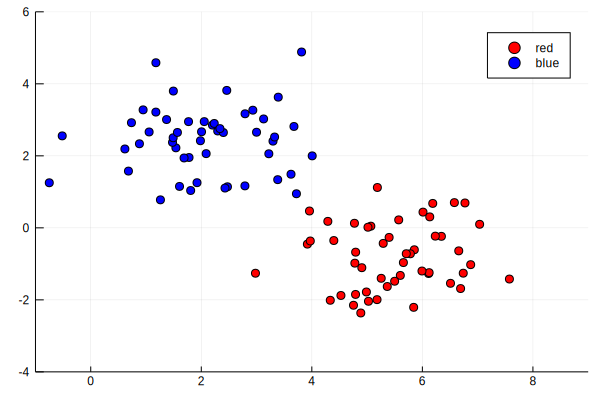

In [2]:
using Plots
using Random

Random.seed!(3)

N = 50
red = randn(N, 2) .+ [5.5 -1.0]
blue = randn(N, 2) .+ [2.0 2.5]

X = vcat(red, blue)
t = vcat(ones(N), ones(N).*-1)

xline = collect(range(-1, 9, length=10000))

scatter(red[:, 1], red[:, 2], label="red", color="red")
scatter!(blue[:, 1], blue[:, 2], label="blue", color="blue")
xlims!(-1, 9)
ylims!(-4, 6)

In [3]:
model = FishersDiscriminant()
fit( model, X, t )

1.9792856842649293

## 決定境界

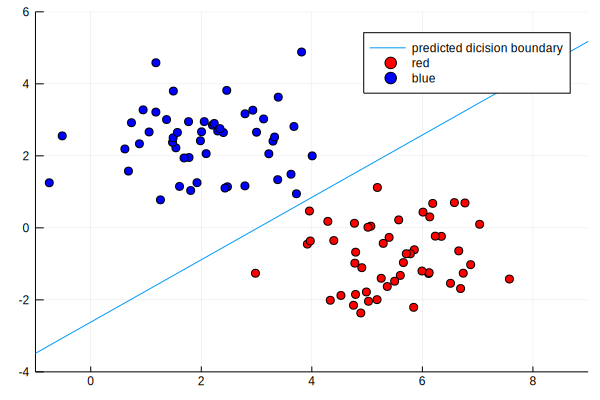

In [4]:
using LinearAlgebra: norm
yline = ( - model.w[1] .* xline .+ model.threshold ) ./ model.w[2]

plot(xline, yline, label="predicted dicision boundary")
scatter!(red[:, 1], red[:, 2], label="red", color="red")
scatter!(blue[:, 1], blue[:, 2], label="blue", color="blue")
xlims!(-1, 9)
ylims!(-4, 6)

## 射影
フィッシャーの線形識別によって求めた重みによって、データを分離させる方向への低次元空間への射影ができる。

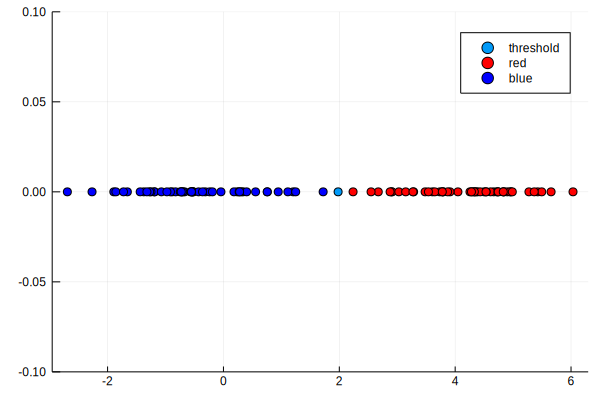

In [5]:
scatter([model.threshold], [0.0], label="threshold")
scatter!(red*model.w, zeros(size(red*model.w)), label="red", color="red")
scatter!(blue*model.w, zeros(size(blue*model.w)), label="blue", color="blue")
ylims!(-0.1, 0.1)